In [ ]:
# https://stackoverflow.com/questions/45741878/using-binary-crossentropy-loss-in-keras-tensorflow-backend
# https://www.machinecurve.com/index.php/2019/10/22/how-to-use-binary-categorical-crossentropy-with-keras/

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, GRU, Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# RNN based Models (RNN & LSTM & GRU) using tensorflow keras

In [ ]:
#normalize X values to help model converge
def normalize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    data = (data - mean) / std
    return data

In [ ]:
def convert_3D(matrix):
    return np.expand_dims(matrix, -1)

In [ ]:
#retrieve and format data - into labels and examples from the dataset
def features_and_labels(filename):
    data = np.matrix(pd.read_csv(filename).values)

    #we need to transpose data sets to be compatable with our weight vectors
    data_y = data[:, 0]
    data_y-=1 #binaryization of the categorical data

    data_x = data[:, 1:]
    data_x = convert_3D(normalize(data_x))
    return data_x, data_y

In [ ]:
training_data_x, training_data_y = features_and_labels("../archive/exoTrain.csv")
test_x, test_y = features_and_labels("../archive/exoTest.csv")

training_data_x, validation_data_x, training_data_y, validation_data_y = train_test_split(training_data_x, training_data_y, test_size=0.3)

In [ ]:
RNNmodel = Sequential([
    SimpleRNN(4, input_shape=(training_data_x.shape[1:]), activation='relu', return_sequences=True),
    SimpleRNN(4, activation='relu'),
    Dense(1)
])

RNNmodel.compile(
    loss=BinaryCrossentropy(from_logits=True), #applies sigmoid to last layer
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

history = RNNmodel.fit(training_data_x, training_data_y, epochs=3, validation_data=(validation_data_x,validation_data_y))

9/9 [==============================] - 2s 177ms/step - loss: 0.0948 - accuracy: 0.9912


[0.09483750909566879, 0.9912280440330505]

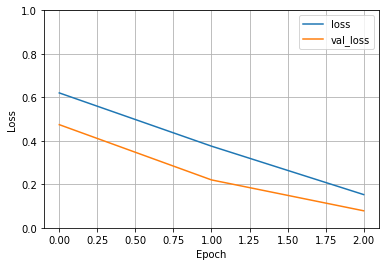

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

RNNmodel.evaluate(test_x, test_y, batch_size=64)

In [ ]:
LSTMmodel = Sequential([
    LSTM(4, input_shape=(training_data_x.shape[1:]), activation='relu', return_sequences=True),
    LSTM(4, activation='relu'),
    Dense(1)
])

LSTMmodel.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

history = LSTMmodel.fit(training_data_x, training_data_y, epochs=3, validation_data=(validation_data_x,validation_data_y))

Epoch 1/3
112/112 [==============================] - 423s 4s/step - loss: nan - accuracy: 0.9937 - val_loss: nan - val_accuracy: 0.9921
Epoch 2/3
112/112 [==============================] - 414s 4s/step - loss: nan - accuracy: 0.9927 - val_loss: nan - val_accuracy: 0.9921
Epoch 3/3
112/112 [==============================] - 416s 4s/step - loss: nan - accuracy: 0.9928 - val_loss: nan - val_accuracy: 0.9921


9/9 [==============================] - 4s 473ms/step - loss: nan - accuracy: 0.9912


[nan, 0.9912280440330505]

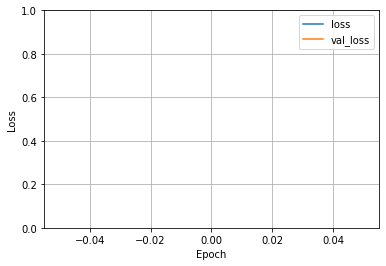

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

LSTMmodel.evaluate(test_x, test_y, batch_size=64)

In [ ]:
GRUmodel = Sequential([
    GRU(4, input_shape=(training_data_x.shape[1:]), activation='relu', return_sequences=True),
    GRU(4, activation='relu'),
    Dense(1)
])

GRUmodel.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

history = GRUmodel.fit(training_data_x, training_data_y, epochs=3, validation_data=(validation_data_x,validation_data_y))

Epoch 1/3
112/112 [==============================] - 430s 4s/step - loss: 0.6395 - accuracy: 0.9920 - val_loss: 0.3727 - val_accuracy: 0.9915
Epoch 2/3
112/112 [==============================] - 573s 5s/step - loss: 0.2071 - accuracy: 0.9945 - val_loss: 0.0495 - val_accuracy: 0.9915
Epoch 3/3
 42/112 [==========>...................] - ETA: 5:52 - loss: 0.0471 - accuracy: 0.9920

KeyboardInterrupt: 

9/9 [==============================] - 4s 398ms/step - loss: 0.3523 - accuracy: 0.9895


[0.35225215554237366, 0.9894737005233765]

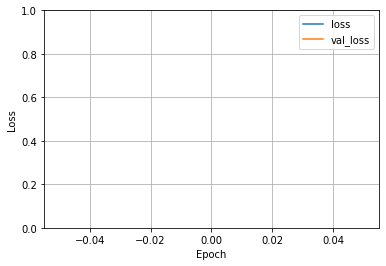

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

GRUmodel.evaluate(test_x, test_y, batch_size=64)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c58af11-5d4f-40f3-a808-e868f2c28485' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>